# TSP Activity

In [1]:
#This code hides warnings - use it to make it easier to novice users, but comment it out when developeing/debugging as
# warnings may be useful!!

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import sys
import random
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import distance
import numpy as np
import utm

In [3]:
#Load problem 
problem = pd.read_csv('./edinburgh.csv')
problem['Text'] = problem['Name']
problem = problem.set_index('Name')
start = (55.948526, -3.198427)
problem

Lattitude  Longitude Text
Name                           
A     55.952655  -3.210045    A
B     55.956500  -3.189775    B
C     55.951790  -3.201456    C
D     55.948138  -3.207124    D
E     55.948522  -3.192524    E
G     55.948907  -3.189432    G
H     55.945160  -3.199756    H

In [4]:
def conv(lat, lon):
    #Lower left

    ll_lon = -3.211108
    ll_lat = 55.944933
    lx, ly, zone, ut = utm.from_latlon(ll_lat, ll_lon)
   
    #Upper right
    ur_lon =  -3.183407
    ur_lat = 55.958019
    rx, ry, zone, ut = utm.from_latlon(ur_lat, ur_lon)

    dx = rx -lx
    dy = ry -ly 
    nx, ny, zone, ut = utm.from_latlon(lat, lon)
    return (((nx-lx)/dx)*300),(((ny-ly)/dy)*300)

In [5]:
def findroute(start, end):
    xystart = conv(start[0],start[1])
    xyend = conv(end[0],end[1])
    return math.dist(xystart, xyend)

In [6]:
def drawMap(solution):
    count=1
    plt.rcParams["figure.figsize"] = [17.00, 13.50]
    plt.rcParams["figure.autolayout"] = True
    im = plt.imread("map.png")
    fig, ax = plt.subplots()
    im = ax.imshow(im, extent=[0, 300, 0, 300])
    # x,y = conv(55.952996,-3.189636)
    # ax.text(x,y, 'H', fontsize = 22)
    for c in solution:
        for index, row in problem.iterrows():
            if row['Text'] == c :
               x,y = conv(row['Lattitude'],row['Longitude'])
               ax.plot(x, y, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
               ax.text(x+2,y-2, (row['Text'] +":"+str(count)), fontsize = 22) 
               count  = count +1 

    plt.show()

In [7]:
#Measure the distance travelled in a solution
def measure(solution):
    prev = start
    dist =0;
    for city in solution:
        loc = (problem.loc[city].Lattitude,problem.loc[city].Longitude)
        d = findroute(prev,loc)
        dist = dist + d
        prev = loc
    d = findroute(loc,prev)
    dist = dist + d
    return dist

In [8]:
def neighbour(city,options):
    loc = (problem.loc[city].Lattitude,problem.loc[city].Longitude)
    dist = sys.maxsize   
    best = ''
    for index, row in problem.iterrows():
        p = (row['Lattitude'],row['Longitude'])
        d = findroute(loc,p)
        current = row['Text']
        if (current != city):
            if current in options:
                if (d<dist):
                    dist = d
                    best = row['Text']
    
    options.remove(best)
    return best,options

In [9]:
def swap_random(seq):
    idx = range(len(seq))
    i1, i2 = random.sample(idx, 2)
    seq[i1], seq[i2] = seq[i2], seq[i1]

### Start Here!

Can you solve the problem by re-arraging the deliveries?

944.7660068448783


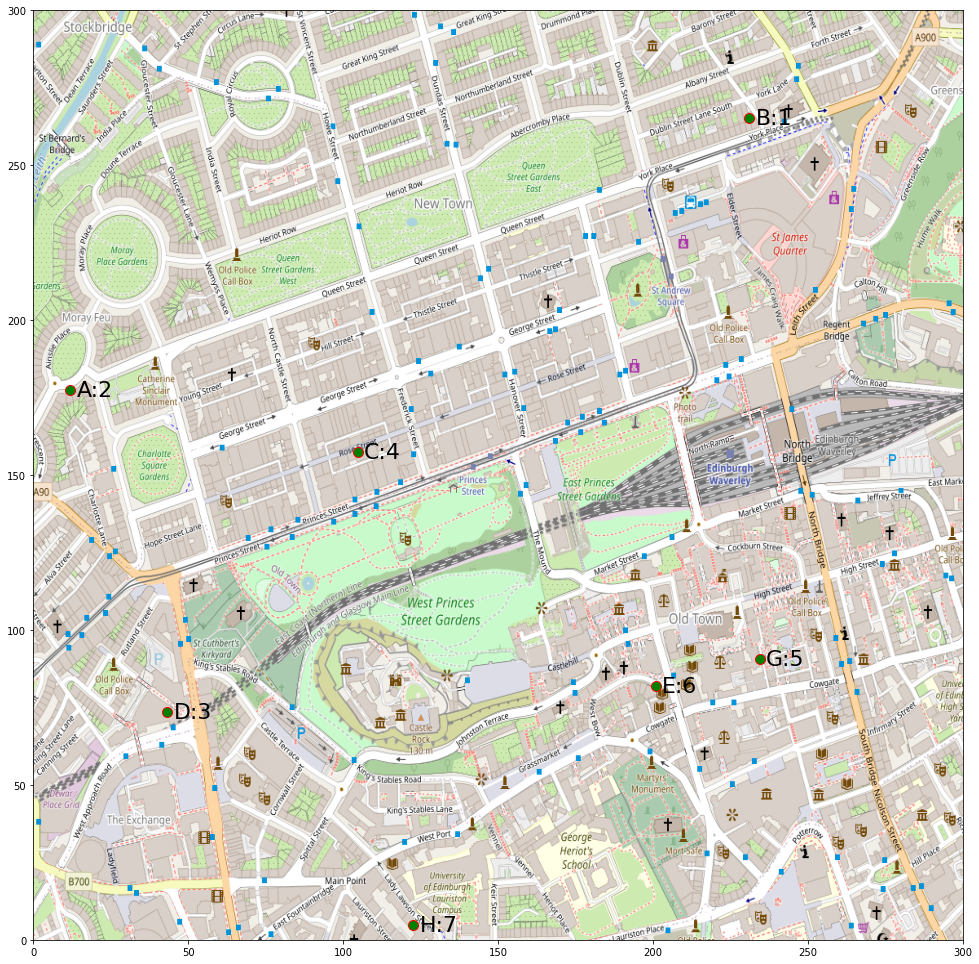

In [10]:
solution = ['B','A','D','C','G','E','H']
dist = measure (solution)
print(dist)
drawMap(solution)

## Use a heuristic  to find a solution

285.48570676959116


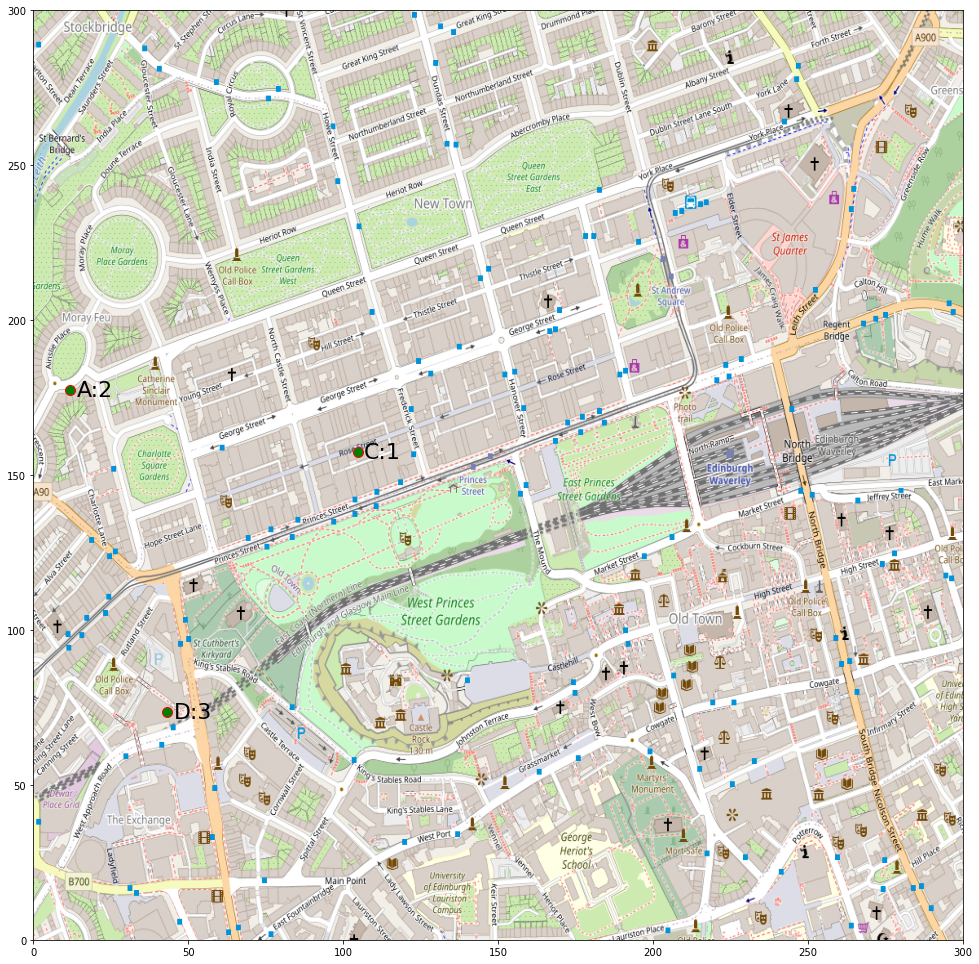

In [11]:
solution = []
possible = ['H','D','A','B','G','E','C']

best, remaining = neighbour('A',possible)
solution.append(best)

best, remaining = neighbour(best,possible)
solution.append(best)

best, remaining = neighbour(best,possible)
solution.append(best)

dist = measure (solution)
print(dist)
drawMap(solution)

In [12]:
solution

['C', 'A', 'D']

## Simple hill climber.....

In [13]:
sol = ['C','D','A','B','G','E','H']
best = measure (sol)

for x in range(0, 100):
    old = sol.copy()
    swap_random(sol)
    n = measure (sol)
    print(str(x) + " : " + str(n) + " " + str(sol) +" "+str(best))
    if (n >= best):
        sol = old
    else:
        print("Found new best! "+ str(n))
        best = n



0 : 1110.4031252072998 ['C', 'D', 'G', 'B', 'A', 'E', 'H'] 849.7006601615637
1 : 957.1614739223696 ['C', 'D', 'A', 'B', 'H', 'E', 'G'] 849.7006601615637
2 : 861.048793014938 ['C', 'D', 'A', 'H', 'G', 'E', 'B'] 849.7006601615637
3 : 891.8899360063705 ['C', 'D', 'A', 'B', 'E', 'G', 'H'] 849.7006601615637
4 : 956.0514821064827 ['C', 'D', 'A', 'B', 'G', 'H', 'E'] 849.7006601615637
5 : 1032.7597980083942 ['G', 'D', 'A', 'B', 'C', 'E', 'H'] 849.7006601615637
6 : 1073.7012164404875 ['C', 'D', 'B', 'A', 'G', 'E', 'H'] 849.7006601615637
7 : 997.8205914205292 ['C', 'D', 'A', 'E', 'G', 'B', 'H'] 849.7006601615637
8 : 997.8205914205292 ['C', 'D', 'A', 'E', 'G', 'B', 'H'] 849.7006601615637
9 : 956.0514821064827 ['C', 'D', 'A', 'B', 'G', 'H', 'E'] 849.7006601615637
10 : 957.1614739223696 ['C', 'D', 'A', 'B', 'H', 'E', 'G'] 849.7006601615637
11 : 1239.14943554634 ['C', 'G', 'A', 'B', 'D', 'E', 'H'] 849.7006601615637
12 : 1239.14943554634 ['C', 'G', 'A', 'B', 'D', 'E', 'H'] 849.7006601615637
13 : 957.

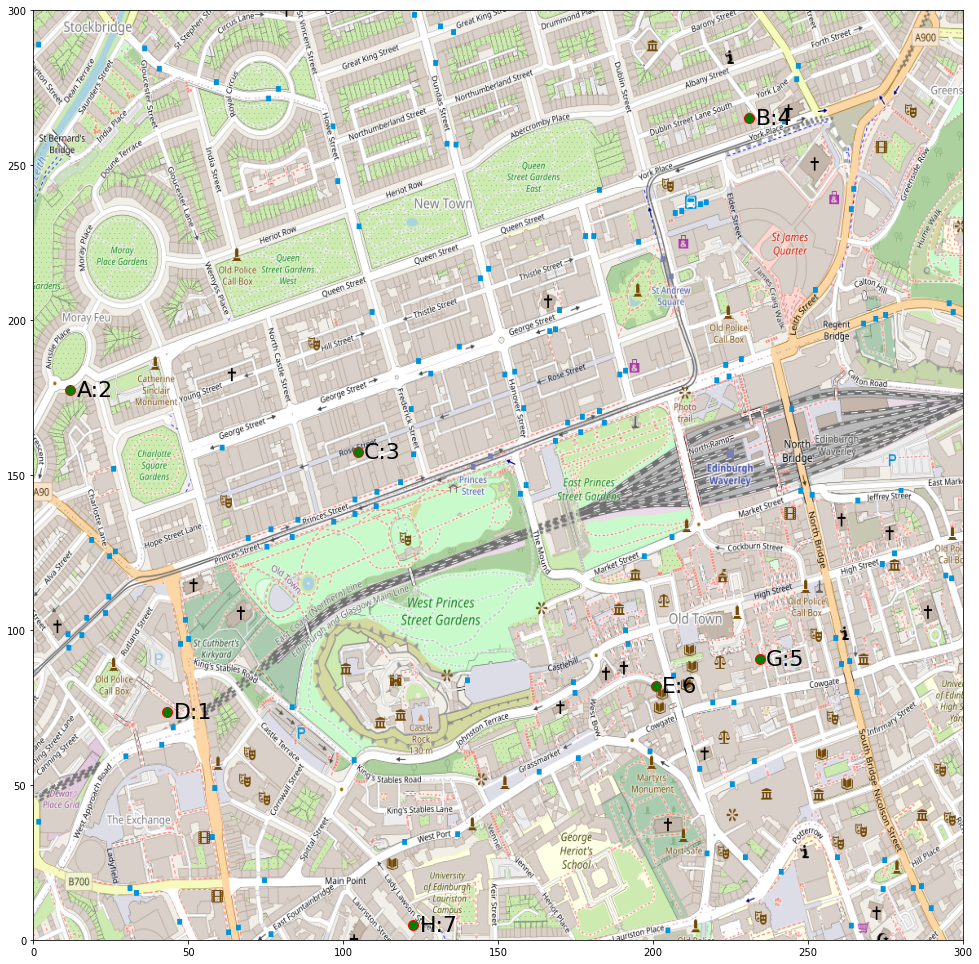

In [14]:
drawMap(sol)

ModuleNotFoundError: No module named 'osmapi'